Import neccessary libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

ETL data from Kaggle

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Final Project Da/healthcare-dataset-stroke-data.csv')

Check information data and describe

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Based on the stroke data, this data contain 5110 values with total 12 columns on the database with 3 dtypes: float64, int64, and object.

General EDA for database

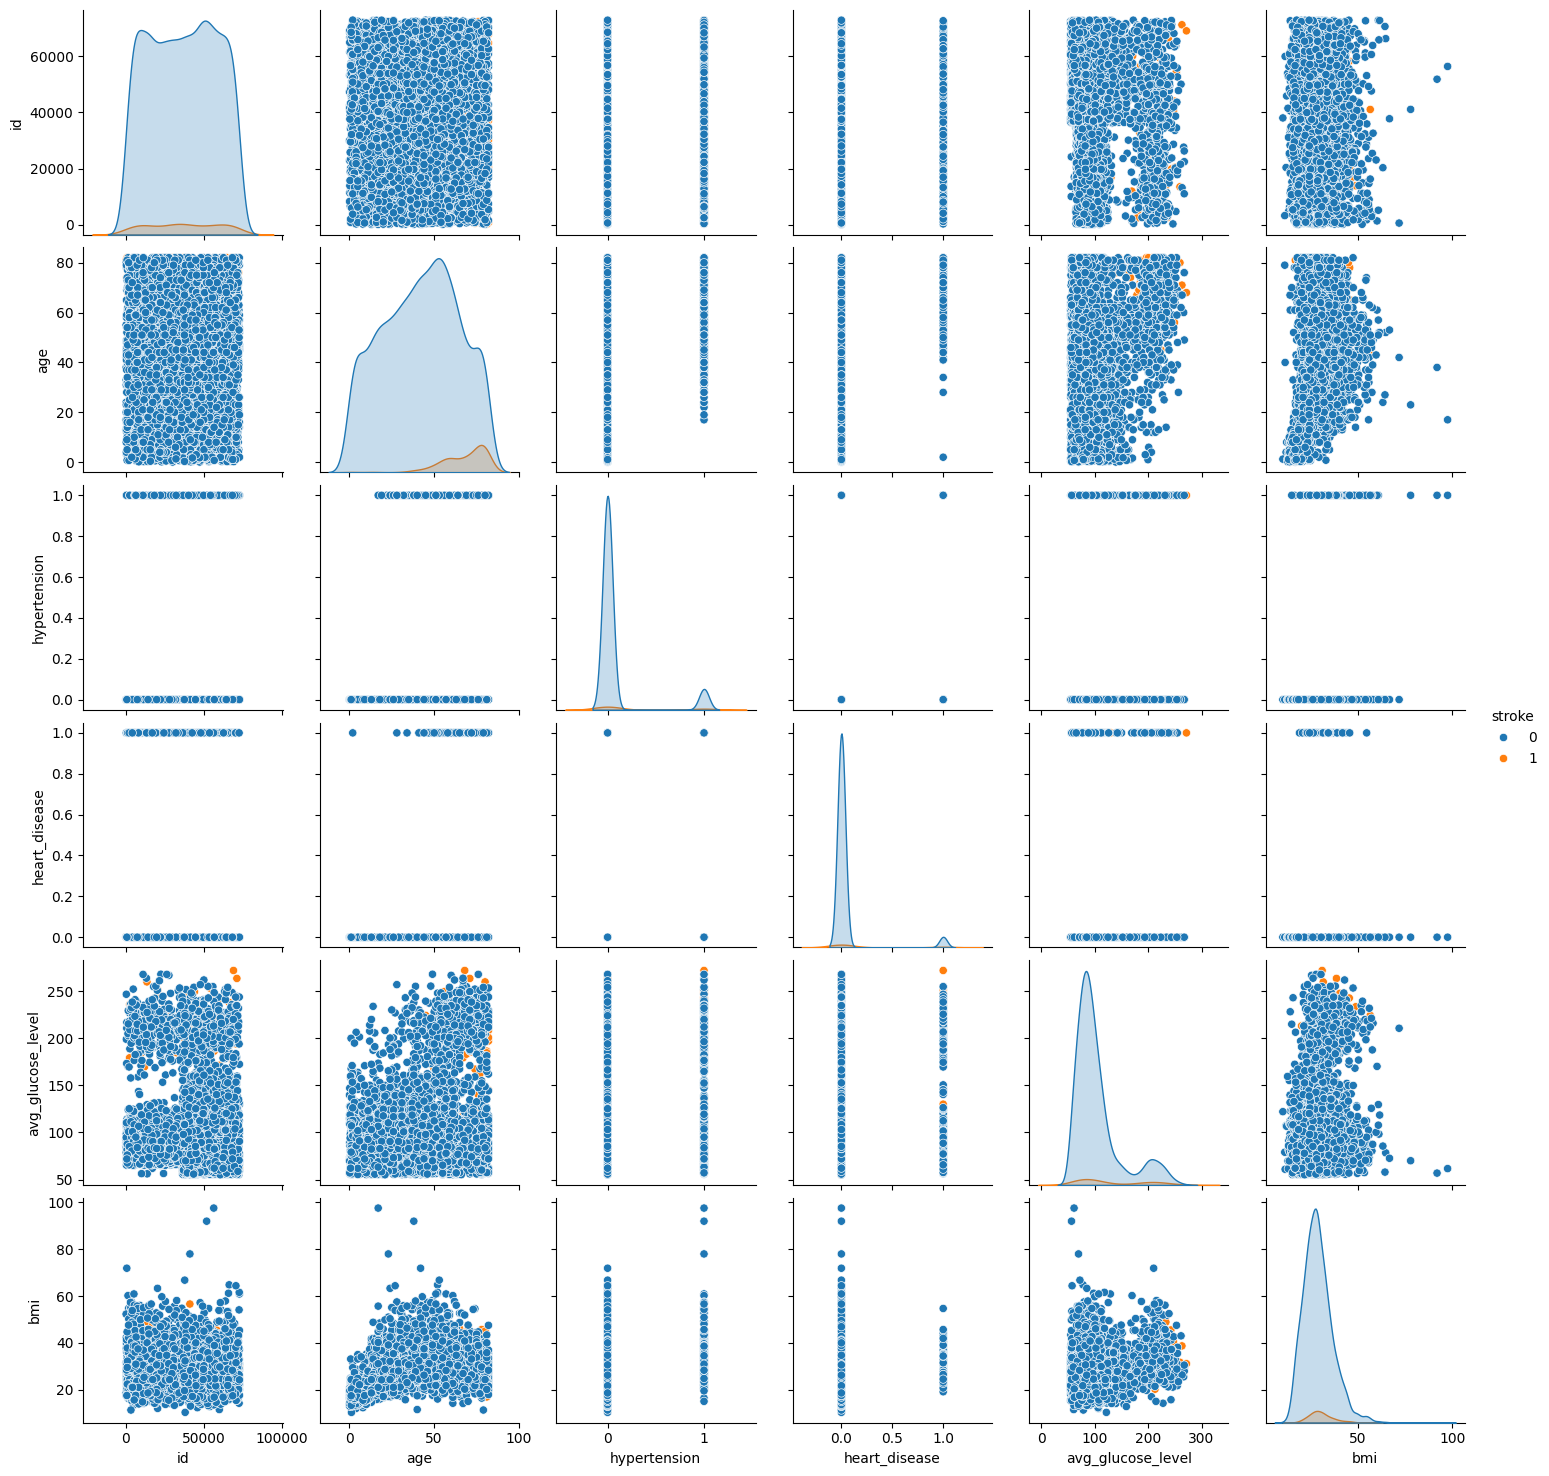

In [6]:
sns.pairplot(df, hue='stroke')


Check the distribution of numeric column in the database

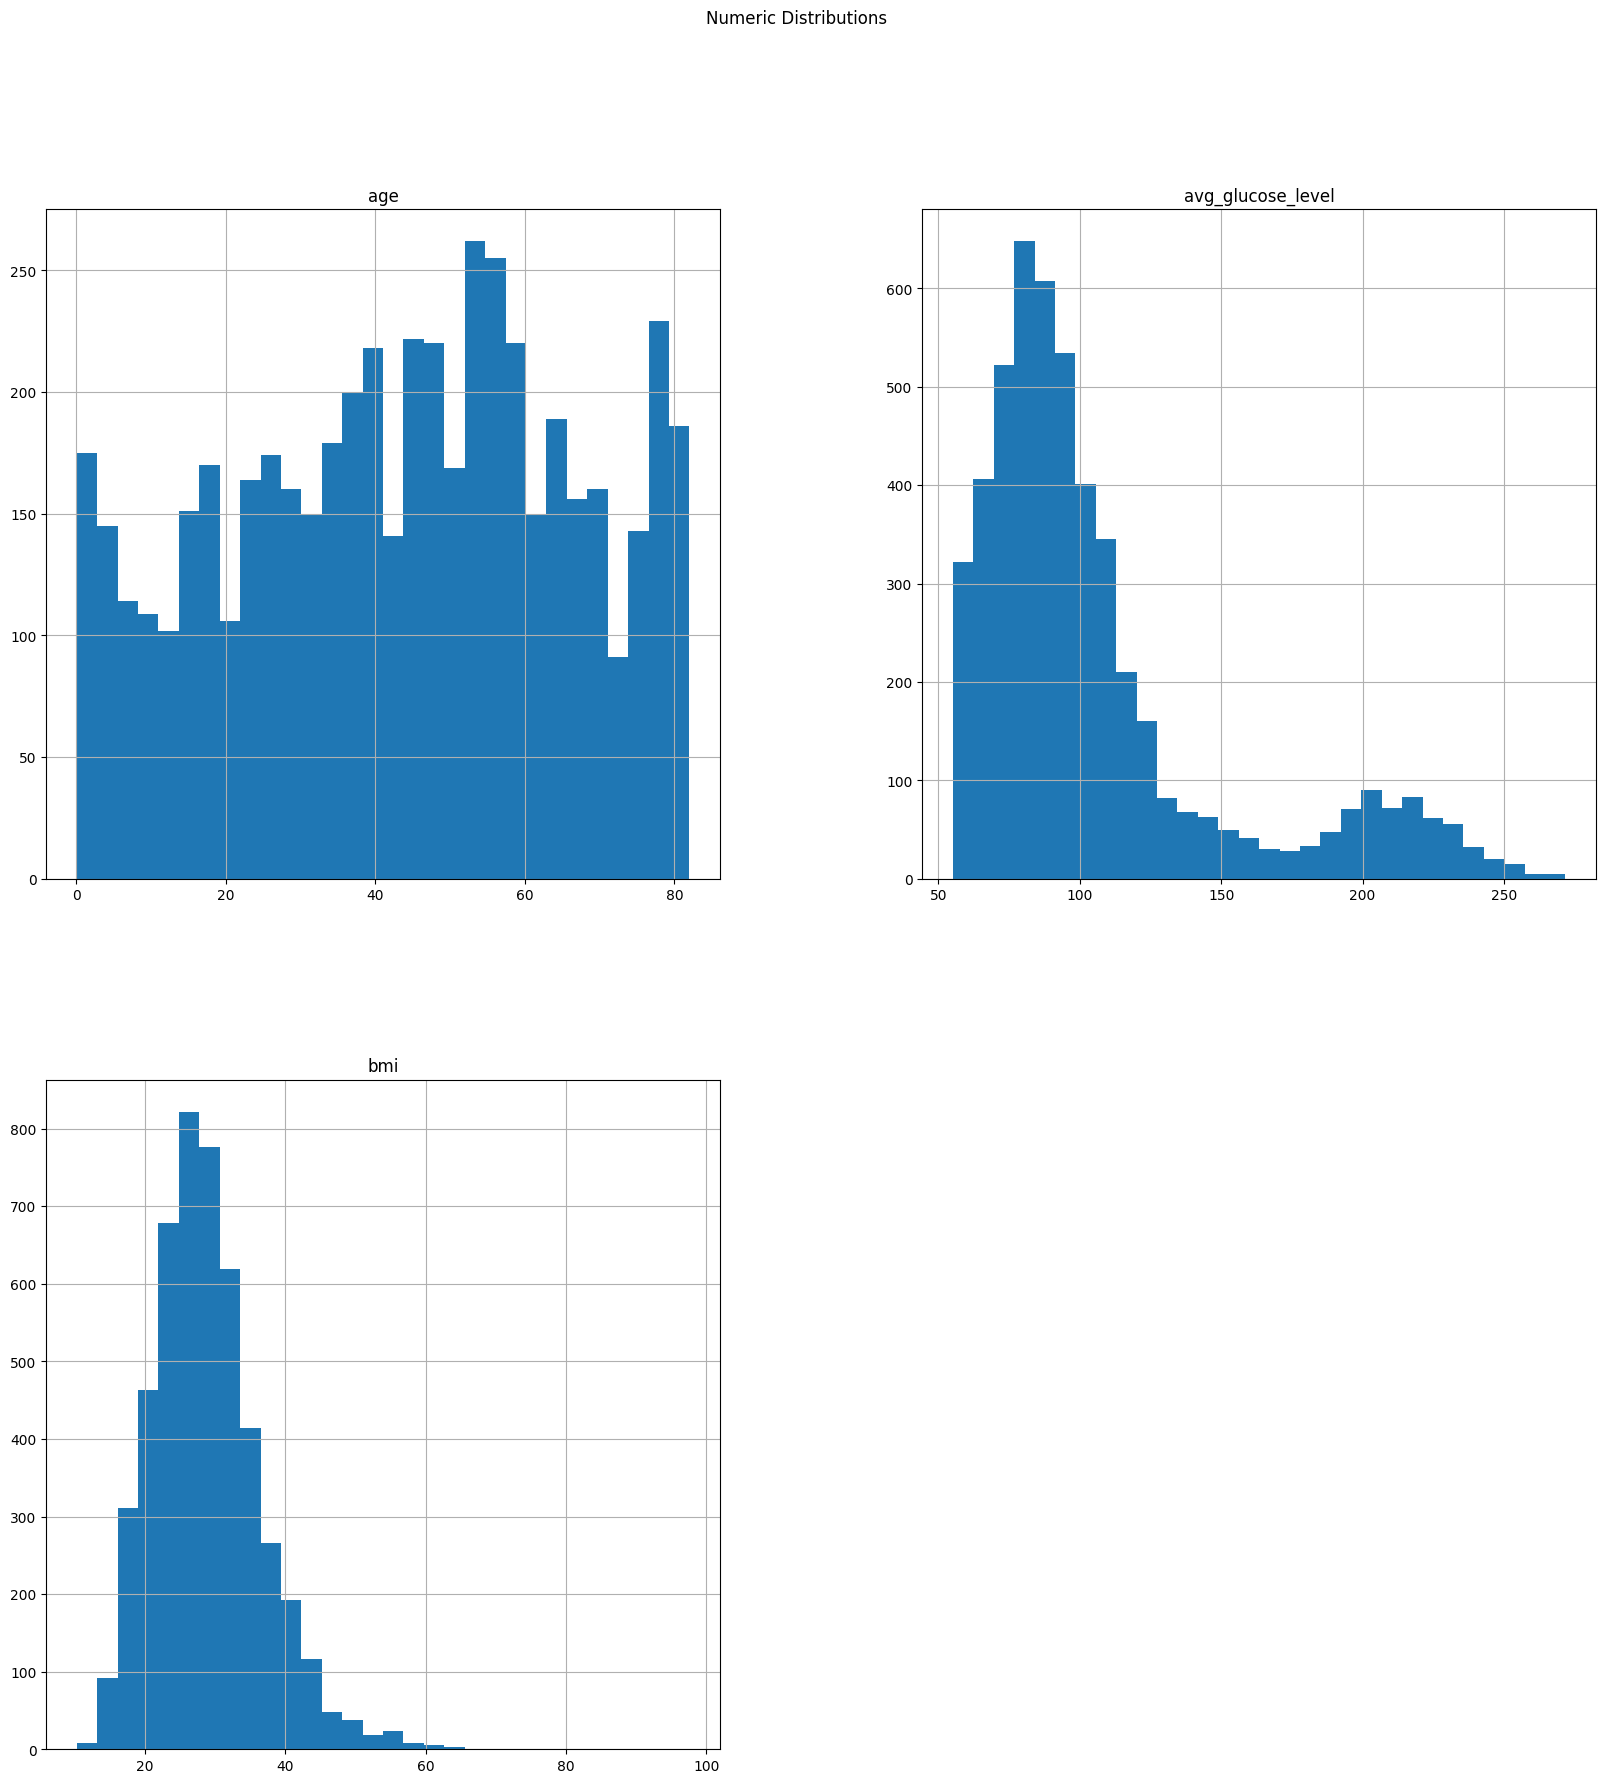

In [7]:
num_cols = ["age","avg_glucose_level","bmi"]
df[num_cols].hist(figsize=(20,20), bins=30)
plt.suptitle("Numeric Distributions")
plt.show()

Check how many this data have null value

In [8]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


Replace null value in bmi

In [9]:
bmi_mean = df['bmi'].mean()
df['bmi'].fillna(bmi_mean, inplace=True)
df.isnull().sum()

/tmp/ipython-input-3225364899.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(bmi_mean, inplace=True)


,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


Drop duplicate value appear in data

In [10]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Create suitable group for some columns



In [11]:
df['smoke_group'] = df['smoking_status'].map(
    lambda x: 'smoking' if x in ['smokes', 'formerly_smoked'] else 'non_smoke')

Convert categorical data to numeric

In [12]:
df_encoded = pd.get_dummies(df, columns=['gender', 'smoke_group', 'ever_married','Residence_type','work_type'])
print(df_encoded)

         id   age  hypertension  heart_disease  avg_glucose_level        bmi  \
0      9046  67.0             0              1             228.69  36.600000   
1     51676  61.0             0              0             202.21  28.893237   
2     31112  80.0             0              1             105.92  32.500000   
3     60182  49.0             0              0             171.23  34.400000   
4      1665  79.0             1              0             174.12  24.000000   
...     ...   ...           ...            ...                ...        ...   
5105  18234  80.0             1              0              83.75  28.893237   
5106  44873  81.0             0              0             125.20  40.000000   
5107  19723  35.0             0              0              82.99  30.600000   
5108  37544  51.0             0              0             166.29  25.600000   
5109  44679  44.0             0              0              85.28  26.200000   

       smoking_status  stroke  gender_F

Drop unecessary column to make the data simple and easy to analys

In [13]:
drop_columns = ['gender_Female', 'gender_Other','smoking_status']
df_encoded.drop(columns=['id']+ drop_columns, inplace=True)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      5110 non-null   float64
 1   hypertension             5110 non-null   int64  
 2   heart_disease            5110 non-null   int64  
 3   avg_glucose_level        5110 non-null   float64
 4   bmi                      5110 non-null   float64
 5   stroke                   5110 non-null   int64  
 6   gender_Male              5110 non-null   bool   
 7   smoke_group_non_smoke    5110 non-null   bool   
 8   smoke_group_smoking      5110 non-null   bool   
 9   ever_married_No          5110 non-null   bool   
 10  ever_married_Yes         5110 non-null   bool   
 11  Residence_type_Rural     5110 non-null   bool   
 12  Residence_type_Urban     5110 non-null   bool   
 13  work_type_Govt_job       5110 non-null   bool   
 14  work_type_Never_worked  

Change suitable type for data

In [14]:

exclude_cols= ['hypertension','heart_disease']
df_encoded = df_encoded.apply(lambda x: x.astype(int) if x.name not in exclude_cols else x)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      5110 non-null   int64
 1   hypertension             5110 non-null   int64
 2   heart_disease            5110 non-null   int64
 3   avg_glucose_level        5110 non-null   int64
 4   bmi                      5110 non-null   int64
 5   stroke                   5110 non-null   int64
 6   gender_Male              5110 non-null   int64
 7   smoke_group_non_smoke    5110 non-null   int64
 8   smoke_group_smoking      5110 non-null   int64
 9   ever_married_No          5110 non-null   int64
 10  ever_married_Yes         5110 non-null   int64
 11  Residence_type_Rural     5110 non-null   int64
 12  Residence_type_Urban     5110 non-null   int64
 13  work_type_Govt_job       5110 non-null   int64
 14  work_type_Never_worked   5110 non-null   int64
 15  work

In [15]:
print(df_encoded)

      age  hypertension  heart_disease  avg_glucose_level  bmi  stroke  \
0      67             0              1                228   36       1   
1      61             0              0                202   28       1   
2      80             0              1                105   32       1   
3      49             0              0                171   34       1   
4      79             1              0                174   24       1   
...   ...           ...            ...                ...  ...     ...   
5105   80             1              0                 83   28       0   
5106   81             0              0                125   40       0   
5107   35             0              0                 82   30       0   
5108   51             0              0                166   25       0   
5109   44             0              0                 85   26       0   

      gender_Male  smoke_group_non_smoke  smoke_group_smoking  \
0               1                      1      

General Analysis data


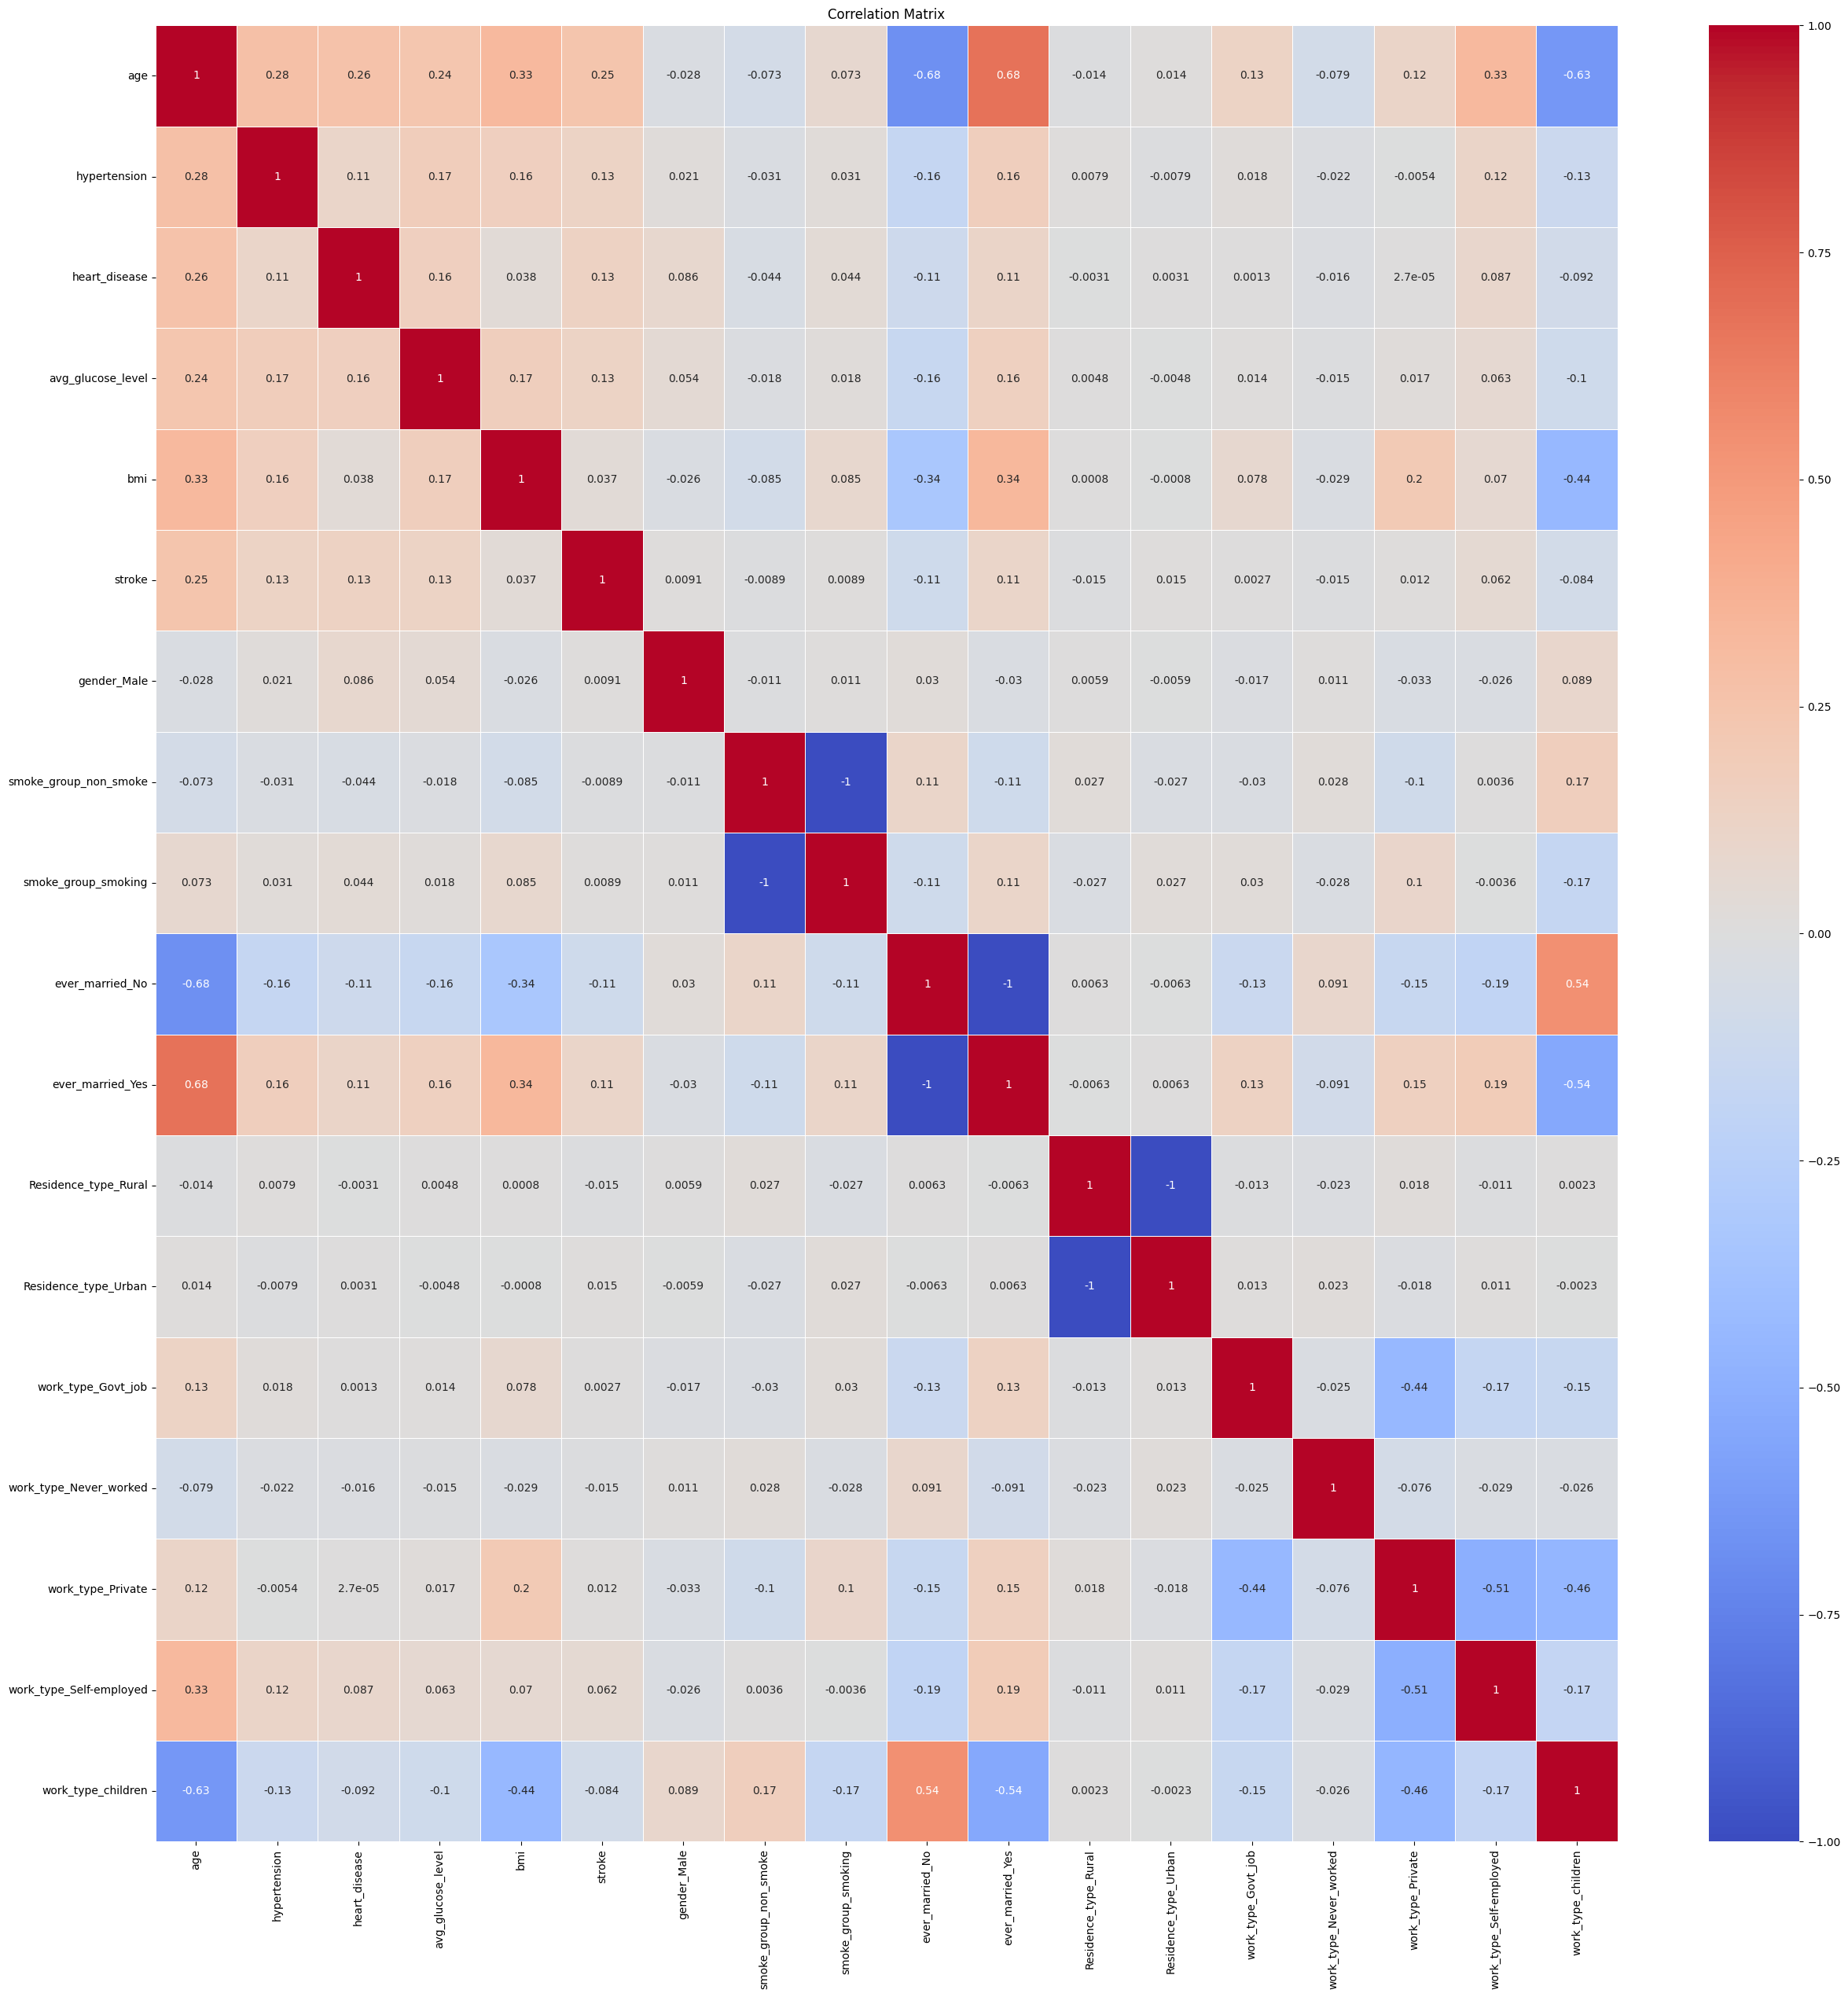

In [16]:
correlation_matrix = df_encoded.corr()
correlation_matrix
plt.figure(figsize=(30,30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Built Regression model

In [17]:
x = df_encoded[['age','bmi','avg_glucose_level','hypertension', 'heart_disease','gender_Male', 'smoke_group_non_smoke','smoke_group_smoking','Residence_type_Rural','Residence_type_Urban','work_type_Govt_job','work_type_Never_worked','work_type_Private','work_type_Self-employed','work_type_children' ]]
y = df_encoded['stroke']
x = sm.add_constant(x)
model= sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 stroke   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     37.62
Date:                Sat, 27 Sep 2025   Prob (F-statistic):           3.96e-85
Time:                        06:34:25   Log-Likelihood:                 813.60
No. Observations:                5110   AIC:                            -1601.
Df Residuals:                    5097   BIC:                            -1516.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [18]:
x= df_encoded[['age','bmi','avg_glucose_level','hypertension', 'heart_disease','smoke_group_non_smoke','smoke_group_smoking','Residence_type_Rural','Residence_type_Urban','work_type_children','work_type_Self-employed' ]]
y = df_encoded['stroke']
x = sm.add_constant(x)
model= sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 stroke   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     49.72
Date:                Sat, 27 Sep 2025   Prob (F-statistic):           7.97e-87
Time:                        06:34:25   Log-Likelihood:                 811.67
No. Observations:                5110   AIC:                            -1603.
Df Residuals:                    5100   BIC:                            -1538.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [19]:
x= df_encoded[['age','bmi','avg_glucose_level','hypertension', 'heart_disease','smoke_group_non_smoke','smoke_group_smoking','Residence_type_Rural','Residence_type_Urban','work_type_children']]
x = sm.add_constant(x)
model= sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 stroke   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     55.49
Date:                Sat, 27 Sep 2025   Prob (F-statistic):           5.28e-87
Time:                        06:34:25   Log-Likelihood:                 810.02
No. Observations:                5110   AIC:                            -1602.
Df Residuals:                    5101   BIC:                            -1543.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.04

The formula for stroke:

stroke = -0.0417 + 0.0025*age -0.0009*bmi + 0.0003*avg_glucose_level +0.0387*hypertension + 0.0549*heart_disease -0.0213*non_smoke -0.0204*smoking -0.0235*Rural - 0.0182*Urban +0.057*children

In [24]:

df_encoded.to_csv("final_project_output.csv", index=False, encoding="utf-8")

